In [2]:
!pip install transformers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Distribution of Target_class')

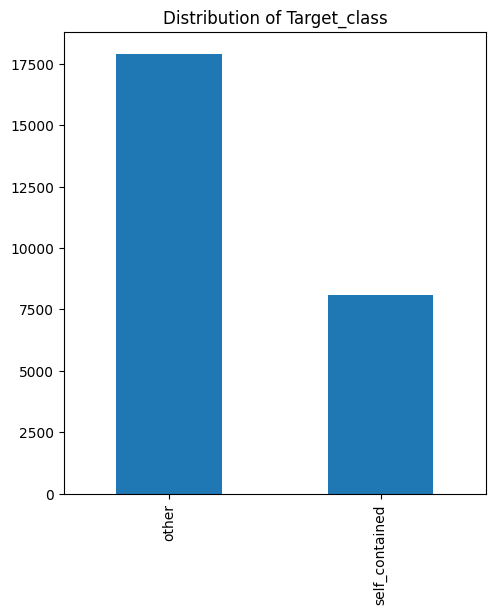

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from data.xlsx file
df = pd.read_excel('/content/org_data.xlsx')

# Find unnamed columns
remove_unname_columns = [col for col in df.columns if col.startswith('Unnamed')]
df = df.drop(columns=remove_unname_columns)

# Drop other unnecessary columns
remove_another_columns = ['Other', 'other']
df = df.drop(columns=remove_another_columns)

# Drop null values
df = df.dropna()

# Map the classes
df['target_class'] = df['Class'].map({
    "Self-contained": 'self_contained',
    "self-contained": 'self_contained',
    "Self-Contained": 'self_contained',
    "Sel-contained": 'self_contained',
    "Other": 'other',
    "other": 'other'
})

# Plot the distribution after merging 6 classes into 2 classes
plt.figure(figsize=(12, 6))
plt.subplot(121)
df['target_class'].value_counts().plot.bar()
plt.title('Distribution of Target_class')


In [5]:
# from transformers import BertTokenizer, BertModel
# # Load the pre_train bert token
# tokenizers = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
# Load pre-trained BERT tokenizer
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model
bert_model = BertModel.from_pretrained('bert-base-uncased')


In [8]:
# load the pre train bert model
# model_bert  = BertTokenizer.from_pretrained('bert-base-uncased')

In [9]:
def bert_emded(text):
  input = tokenizer(text,return_tensors='pt', padding=True, truncation=True)
  # bert embedding for sentence
  with torch.no_grad():
    results = bert_model(**input)
  embed = results.last_hidden_state[:, 0, :]
  return embed.numpy()


In [10]:
df.head(3)

,ID,Class,Text,target_class
0,1_UK_DocG_Sanitation,Other,"However, building work may be subject to more ...",other
1,2_UK_DocG_Sanitation,Other,Consideration of technical risk.,other
2,3_UK_DocG_Sanitation,Other,In relation to the installation of new and rep...,other


In [ ]:
df['vector'] = df['Text'].apply(bert_emded)

In [ ]:
df.head(3)

In [ ]:
x = np.vstack(df['vector'])
y = df['target_class']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
Lreg_model = LogisticRegression()

In [ ]:
Lreg_model.fit(X_train,Y_train)

In [ ]:
predication = Lreg_model.predict(X_test)

In [ ]:
accuracy_Lreg_model = accuracy_score(Y_test,predication)

In [2]:
print(f'Accuracy of Logistic Regression model using BERT Technique :{accuracy_Lreg_model}')

Accuracy of Logistic Regression model using BERT Technique :97
